Mode d'emploi de l'animation :<br>
- Mise en pause/relancer : cliquer sur une touche du clavier. 
- Les curseurs adaptent les paramètres de l'animation (et la relancent si elle est arrétée). 
- La partie gauche représente l'évolution temporelle d'une perturbation (point bleu)
Représentation <br>
    $y(t)=A.cos(\frac{2\pi }{T}\times t+\varphi )$
- La partie droite représente, en pointillés bleu, la propagation de la perturbation selon l'axe x (si c n'est pas nulle)


<IPython.core.display.Javascript object>


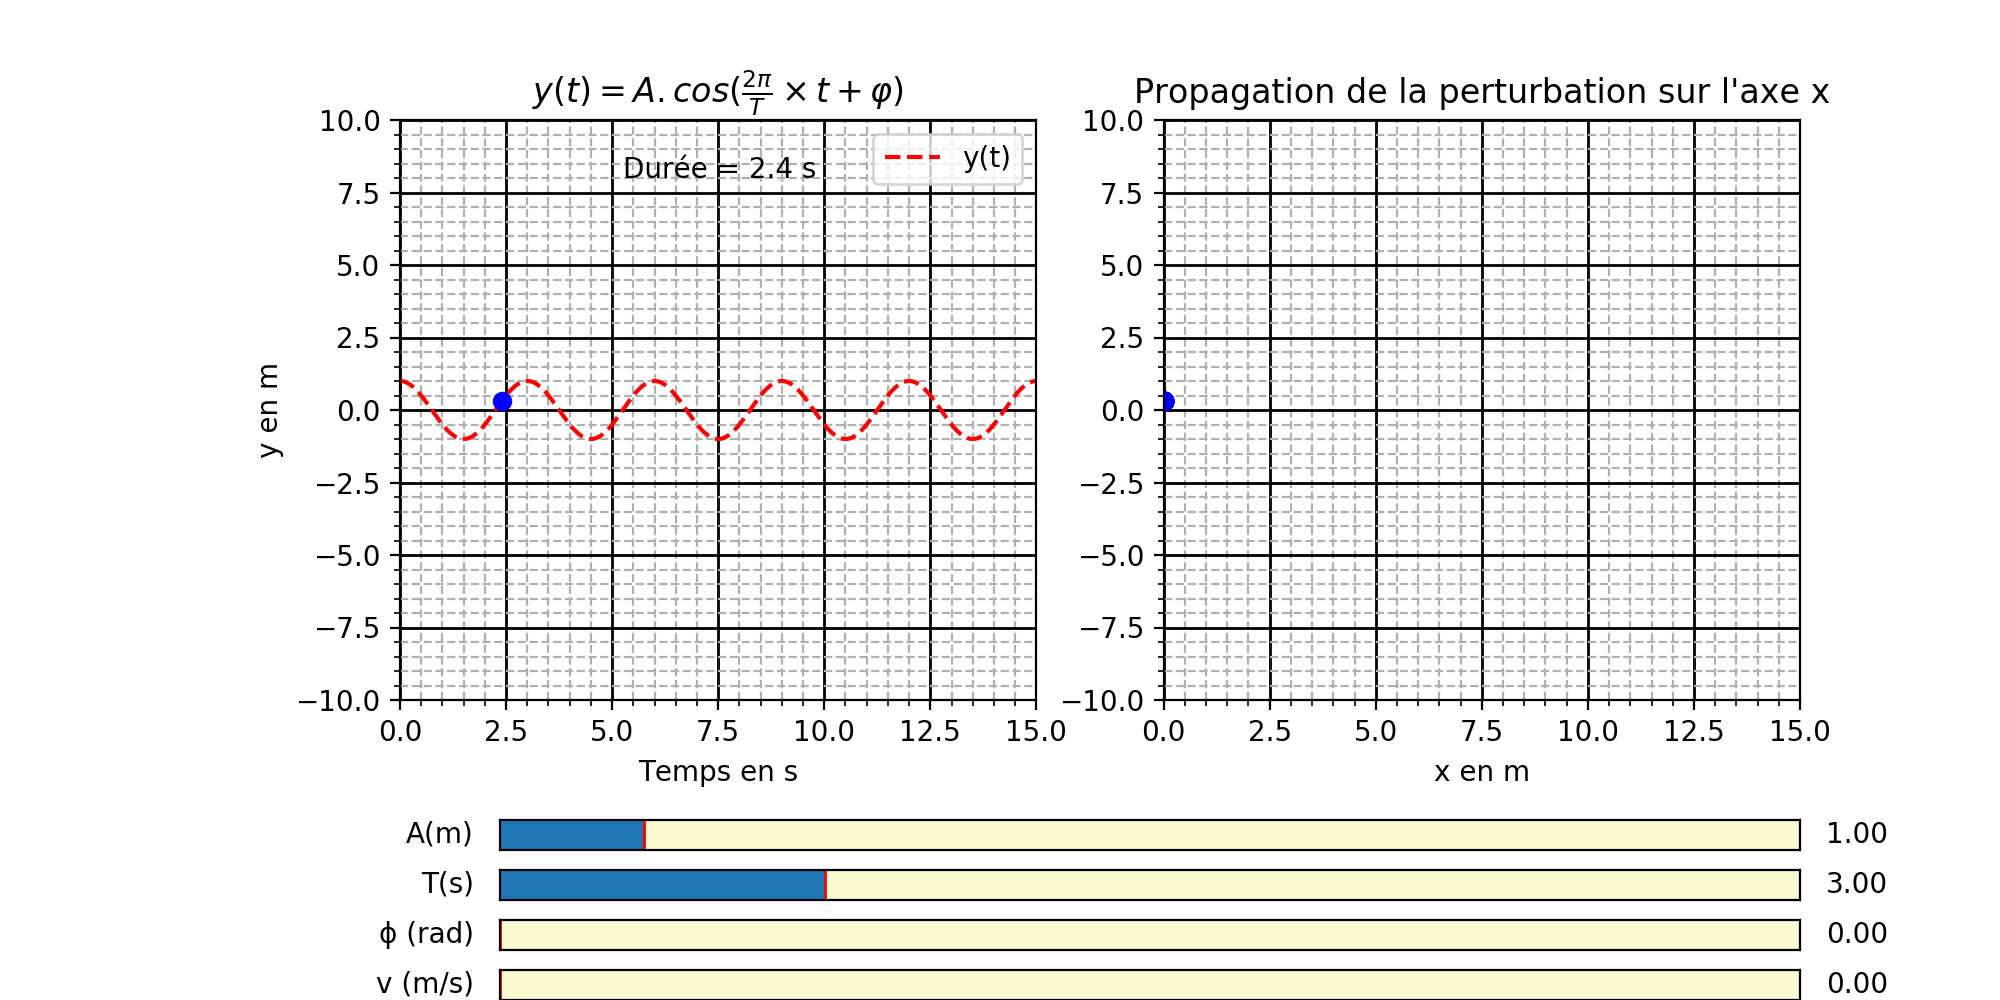

0

In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.widgets import Slider
import matplotlib.animation as animation

#Paramètres physiques initiaux 
A=1
phi=0
T=3
v=0

#Paramètres de l'animation
pas=0.5
tmax=5*T
xmax=15
dt = 0.1
nbx = 200
t=np.linspace(0,20,1000)
xp = np.linspace(0., 0., nbx)
x= np.linspace(0, 20, nbx)
pause=False

#fonction pour ajuster les paramètres avec les curseurs
def update(val):
    global A,phi,T,v,stop,pause
    A= sf.val
    T=s2f.val
    phi=s3f.val
    v=s4f.val
    signal.set_ydata(A*np.cos(2*(np.pi/T)*t+phi))
    if pause:
        ani.event_source.start()
        pause = False
    fig.canvas.draw_idle()

#fonction qui met en pause ou relance l'animation     
def onClick(event):
    global pause
    if pause:
        ani.event_source.start()
        pause = False
    else:
        ani.event_source.stop()
        pause = True
        
#fonction qui adapte les paramètres lors de l'animation 
def animate(i):
    t = i * dt
    time_text.set_text(time_template%(t))
    if v>0:
        yp =A* np.cos(2*(np.pi/T)*t+phi - 2*(np.pi/T)*xp/v)
    else :
        yp =A* np.cos(2*(np.pi/T)*t+phi)
    y =A* np.cos(2*(np.pi/T)*t+phi - 2*(np.pi/T)*x/v)
    point.set_data(t,yp)
    line.set_data(xp, yp)
    line2.set_data(x, y)
    return line,point,line2,time_text

#Début du tracé des graphiques
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(121)
# Pn laisse de la place pour les curseurs sous le schéma
fig.subplots_adjust(left=0.2, bottom=0.3)

#Graphe y=f(t)
plt.axis([0, tmax, -10, 10])
plt.grid(which="major",linestyle='-',linewidth=1, color='black')
plt.grid(which="minor",linestyle='--')
plt.title(r'$y(t)=A.cos(\frac{2\pi }{T}\times t+\varphi )$')
plt.xlabel('Temps en s')
plt.ylabel('y en m')
ax=plt.gca()
ax.minorticks_on()
signal,=plt.plot(t, A*np.cos(2*(np.pi/T*t+phi)) ,'--', color='red',label='y(t)')
point,=plt.plot([],[],'bo')
plt.legend()

#Graphe y=f(x)
ax2 = fig.add_subplot(122,sharey=ax)
plt.axis([0, xmax, -10, 10])
line,=plt.plot([],[],'bo')
line2,=plt.plot([],[],'--')
plt.grid(which="major",linestyle='-',linewidth=1, color='black')
plt.grid(which="minor",linestyle='--')
ax2.minorticks_on()
plt.title("Propagation de la perturbation sur l'axe x")
plt.xlabel('x en m')
ax2=plt.gca()

#Création des curseurs
axcolor = 'lightgoldenrodyellow'
axf = fig.add_axes([0.25, 0.15, 0.65, 0.03], facecolor=axcolor)
sf = Slider(axf, 'A(m)', 0, 9,valinit=A, valstep=pas)
ax2f = fig.add_axes([0.25, 0.1, 0.65, 0.03], facecolor=axcolor)
s2f = Slider(ax2f, 'T(s)', 0, 4*T, valinit=T,valstep=T/100)
ax3f = fig.add_axes([0.25, 0.05, 0.65, 0.03], facecolor=axcolor)
s3f = Slider(ax3f, 'ϕ (rad)', 0, 9, valinit=0,valstep=0.001)
ax4f = fig.add_axes([0.25, 0, 0.65, 0.03], facecolor=axcolor)
s4f = Slider(ax4f, 'v (m/s)', 0, 9, valinit=0,valstep=0.01)

#Animation
time_template = 'Durée = %.1f s'
time_text = ax.text(0.35, 0.9, '', transform=ax.transAxes)
fig.canvas.mpl_connect('key_press_event', onClick)
ani = animation.FuncAnimation(fig, animate, frames=150,  interval=14, repeat=True)

#Suivi des curseurs
sf.on_changed(update)
s2f.on_changed(update)
s3f.on_changed(update)
s4f.on_changed(update)
